# Project Introduction

**Objective:**

Analyze customer behavior in hotel bookings and its correlation with cancellations.

**Approach:**
* **In-Depth Analysis:** Explore customer actions in the hotel booking process.
* **Correlation Study:** Identify links between customer behavior and booking cancellations.

**Expected Outcomes:**

Present compelling visualizations for actionable insights, enhancing business performance in the hospitality sector.

# Notebook Preparation

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from matplotlib import rcParams
from scipy import stats


print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")

Numpy version: 1.23.5
Pandas version: 1.5.3
Seaborn version: 0.12.2


In [67]:
import warnings
warnings.filterwarnings('ignore') ##Be careful in using this code! It makes warning invisible.

In [68]:
df = pd.read_csv("hotel_bookings_data.csv", sep = ',')

df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
46391,City Hotel,0,0,2017,February,53,31,0,1,2,...,0,No Deposit,9.0,NaN,0,Personal,135.00,0,0,Check-Out
82131,City Hotel,1,99,2018,April,8,19,0,1,2,...,0,No Deposit,NaN,67.0,0,Family,80.00,0,0,Canceled
77032,City Hotel,1,262,2017,January,46,9,1,2,2,...,0,Non Refund,1.0,NaN,0,Personal,62.80,0,0,Canceled
28842,Resort Hotel,0,9,2018,December,42,9,2,1,2,...,0,No Deposit,240.0,NaN,0,Personal,139.67,0,2,Check-Out
4161,Resort Hotel,0,108,2018,April,8,20,4,10,2,...,0,No Deposit,115.0,NaN,0,Family,63.90,0,1,Check-Out


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Preprocessing

## Handling Missing Value

In [70]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [71]:
col_isna = ['children', 'city', 'agent', 'company']

for col in col_isna:
  print(f"There's {df[col].isna().sum()} rows with missing value in {col} column. That is {round((df[col].isna().sum()/len(df))*100,3)}% of entire data")

There's 4 rows with missing value in children column. That is 0.003% of entire data
There's 488 rows with missing value in city column. That is 0.409% of entire data
There's 16340 rows with missing value in agent column. That is 13.686% of entire data
There's 112593 rows with missing value in company column. That is 94.307% of entire data


We will drop the company column and do imputation for the rest of the columns.

In [72]:
# Drop 'company' columns
df.drop('company', axis = 1, inplace = True)

# Impute missing values in 'children', 'city', and 'agent' columns.
missing_value_replacement = {'children' : 0,
                            'city' : 'Unknown',
                             'agent' : 0}

df = df.fillna(missing_value_replacement)

In [73]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

## Replacing Unsuitable Values

In [74]:
# Get categorical columns
cats = df.select_dtypes(include=['object']).columns.tolist()

for col in cats:
  print(f"Categories in {col}:\n{df[col].unique()}\n\n")

Categories in hotel:
['Resort Hotel' 'City Hotel']


Categories in arrival_date_month:
['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']


Categories in meal:
['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']


Categories in city:
['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' 'Unknown' 'Kabupaten Tangerang'
 'Kota Semarang' 'Kota Serang' 'Kota Tangerang' 'Kota Bogor'
 'Kabupaten Bandung' 'Kabupaten Magelang' 'Kabupaten Sumedang'
 'Kota Jakarta Timur' 'Kabupaten Purwakarta' 'Kabupaten Kepulauan Seribu'
 'Kabupaten Belitung' 'Kota Jakarta Pusat' 'Kota Jakarta Selatan'
 'Kota Surabaya' 'Kota Jakarta Utara' 'Kota Gorontalo' 'Kota Jambi'
 'Kota Jakarta Barat' 'Kota Bengkulu' 'Kabupaten Bandung Barat'
 'Kabupaten Bekasi' 'Kabupaten Bogor' 'Kabupaten Ciamis'
 'Kabupaten Cianjur' 'Kabupaten Cirebon' 'Kota Cimahi'
 'Kabupaten Indramayu' 'Kabupaten Karawang' 'Kabupaten Kun

There's an unsuitable values in **'meal'** column. The **'Undefined'** category can be categorized as **'No meal'**.

In [75]:
# Replacing rows with 'Undefined' values to 'No Meal'.

df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')

In [76]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

## Feature Extraction

In [77]:
# Adding 'total_guest' column which contains the total of adults, children, and babies stayed in the hotel per reservation

df['total_guest'] = df['adults'] + df['children'] + df['babies']

In [78]:
total_zero_guest_bf = len(df[df['total_guest'] == 0])

print(f"There's {total_zero_guest_bf} reservation with 0 guest. Therefore, we have to drop the rows.")

There's 180 reservation with 0 guest. Therefore, we have to drop the rows.


In [79]:
# Drop reservations with 0 guest.
df = df[df['total_guest']!=0]

In [80]:
total_zero_guest_aft =len(df[df['total_guest'] == 0])

print(f"There's {total_zero_guest_aft} reservation with 0 guest.")

There's 0 reservation with 0 guest.


# Monthly Hotel Analysis Based on Model Type

Compare the total of reservation per month based on the type of hotel (city hotel and resort)

Relate the data to the holiday season. Is holiday season influence the amount of hotel reservation?

In [81]:
# Group by month and hotel type
hotel_booked_monthly = df.groupby(['arrival_date_month', 'hotel']).agg({'reservation_status' : 'count', 'arrival_date_year' : 'nunique'}).reset_index()

hotel_booked_monthly.columns = ['month', 'hotel_type', 'total_reservation', 'number_of_year']

# Sorting data based on Month
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

hotel_booked_monthly = hotel_booked_monthly.sort_values('month', key = lambda x : pd.Categorical(x, categories=months, ordered=True))

# Shorten characters in month column.
hotel_booked_monthly['month'] = hotel_booked_monthly['month'].str.slice(0,3)

hotel_booked_monthly

,month,hotel_type,total_reservation,number_of_year
8,Jan,City Hotel,4336,2
9,Jan,Resort Hotel,2435,2
6,Feb,City Hotel,4114,2
7,Feb,Resort Hotel,2645,2
15,Mar,Resort Hotel,2191,2
14,Mar,City Hotel,3730,2
0,Apr,City Hotel,4950,2
1,Apr,Resort Hotel,3102,2
17,May,Resort Hotel,3334,2
16,May,City Hotel,6434,2


The month September and October have a different number of year. Therefore, we have to normalize the data.

In [82]:
# Apply Normalization

hotel_booked_monthly['avg_reservation'] = round(hotel_booked_monthly['total_reservation'] / hotel_booked_monthly['number_of_year'], 2)

hotel_booked_monthly

,month,hotel_type,total_reservation,number_of_year,avg_reservation
8,Jan,City Hotel,4336,2,2168.00
9,Jan,Resort Hotel,2435,2,1217.50
6,Feb,City Hotel,4114,2,2057.00
7,Feb,Resort Hotel,2645,2,1322.50
15,Mar,Resort Hotel,2191,2,1095.50
14,Mar,City Hotel,3730,2,1865.00
0,Apr,City Hotel,4950,2,2475.00
1,Apr,Resort Hotel,3102,2,1551.00
17,May,Resort Hotel,3334,2,1667.00
16,May,City Hotel,6434,2,3217.00


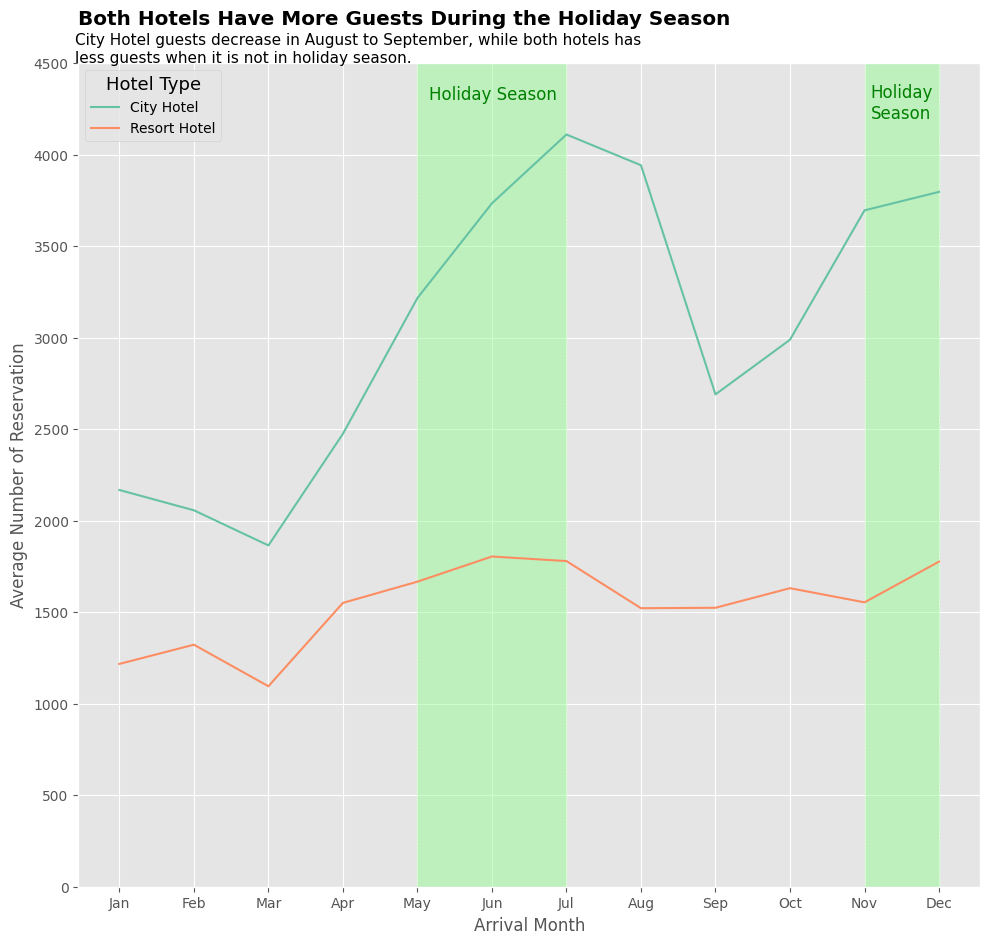

In [83]:
style.use('ggplot')

plt.figure(figsize = (10, 10), tight_layout = True)

ax = sns.lineplot(data = hotel_booked_monthly, x = 'month', y = 'avg_reservation', hue = 'hotel_type', palette = 'Set2')

plt.title('Both Hotels Have More Guests During the Holiday Season', loc =  'left', y = 1.037, weight= 'bold')
plt.suptitle('City Hotel guests decrease in August to September, while both hotels has\nless guests when it is not in holiday season.',
             x = 0.08, y = 0.9, ha = 'left', fontsize = 11, fontweight = 'light', va = 'center')
plt.xlabel ('Arrival Month')
plt.ylabel ('Average Number of Reservation')
plt.ylim(0, 4500)
ax.legend(title = 'Hotel Type', title_fontsize = 13, loc = 'upper left')

plt.axvspan('May', 'Jul', color = 'palegreen', alpha = 0.5, ls = '--')
plt.axvspan('Nov', 'Dec', color = 'palegreen', alpha = 0.5, ls = '--')
plt.text(x = 4.15, y = 4300, s = 'Holiday Season', fontsize = 12, color = 'green')
plt.text(x = 10.085, y = 4200, s = 'Holiday\nSeason', fontsize = 12, color = 'green')

plt.show()


# Impact Analysis of Stay Duration on Hotel Bookings Cancelation Rates

In [84]:
# Adding stay duration column
df['stay_duration'] = df['stays_in_weekdays_nights'] + df['stays_in_weekend_nights']

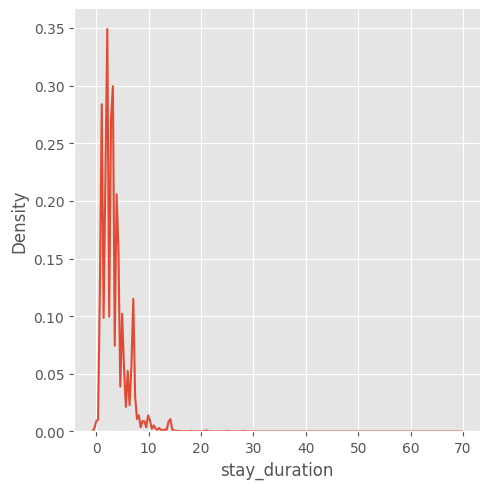

In [85]:
# Stay duration distribution plot
sns.displot(df, x='stay_duration', kind="kde")

In [86]:
# Adding week duration column
week_duration = []

for x in df['stay_duration']:
  if x >= 1 and x <= 7:
    week = '1 Week'
  elif x >= 8 and x <= 14:
    week = '2 Weeks'
  elif x >= 15 and x <= 21:
    week = '3 Weeks'
  elif x >= 22 and x <= 28:
    week = '4 Weeks'
  elif x >= 29:
    week = '5+ Weeks'
  else:
    week = '0 Week'
  week_duration.append(week)

df['week_duration'] = week_duration

In [87]:
df['week_duration'].unique()

array(['0 Week', '1 Week', '2 Weeks', '3 Weeks', '5+ Weeks', '4 Weeks'],
      dtype=object)

In [88]:
# Drop rows that have 0 week
df = df[df['week_duration'] != '0 Week']

<Axes: xlabel='week_duration', ylabel='Count'>

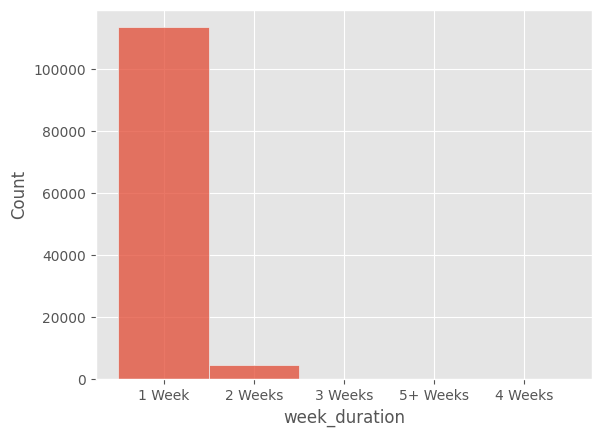

In [89]:
# Week duration distribution plot
sns.histplot(df['week_duration'])

In [90]:
# Group by hotel type, week duration, and whether it is canceled or not

hotel_booked_canceled = df.groupby(['hotel', 'week_duration', 'is_canceled']).agg({'reservation_status' : 'count'}).reset_index()

hotel_booked_canceled.columns = ['hotel_type', 'week_duration', 'is_canceled', 'total_reservation']

hotel_booked_canceled = hotel_booked_canceled.reset_index()

hotel_booked_canceled.drop('index', axis = 1, inplace = True)

hotel_booked_canceled

,hotel_type,week_duration,is_canceled,total_reservation
0,City Hotel,1 Week,0,45287
1,City Hotel,1 Week,1,32391
2,City Hotel,2 Weeks,0,511
3,City Hotel,2 Weeks,1,558
4,City Hotel,3 Weeks,0,29
5,City Hotel,3 Weeks,1,76
6,City Hotel,4 Weeks,0,4
7,City Hotel,4 Weeks,1,21
8,City Hotel,5+ Weeks,0,2
9,City Hotel,5+ Weeks,1,20


In [91]:
hotel_booked_canceled = pd.pivot_table(hotel_booked_canceled,
                                       index = ['hotel_type', 'week_duration'],
                                       columns = 'is_canceled',
                                       values = 'total_reservation').reset_index()

hotel_booked_canceled

is_canceled,hotel_type,week_duration,0,1
0,City Hotel,1 Week,45287,32391
1,City Hotel,2 Weeks,511,558
2,City Hotel,3 Weeks,29,76
3,City Hotel,4 Weeks,4,21
4,City Hotel,5+ Weeks,2,20
5,Resort Hotel,1 Week,25754,9907
6,Resort Hotel,2 Weeks,2650,1078
7,Resort Hotel,3 Weeks,90,79
8,Resort Hotel,4 Weeks,44,39
9,Resort Hotel,5+ Weeks,18,7


In [92]:
hotel_booked_canceled.columns = ['hotel_type', 'week_duration', 'continued', 'canceled']

In [93]:
hotel_booked_canceled['canceled_percentage'] = round(hotel_booked_canceled['canceled'] /
                                                     (hotel_booked_canceled['continued'] + hotel_booked_canceled['canceled'])
                                                     * 100 , 2)

hotel_booked_canceled

,hotel_type,week_duration,continued,canceled,canceled_percentage
0,City Hotel,1 Week,45287,32391,41.70
1,City Hotel,2 Weeks,511,558,52.20
2,City Hotel,3 Weeks,29,76,72.38
3,City Hotel,4 Weeks,4,21,84.00
4,City Hotel,5+ Weeks,2,20,90.91
5,Resort Hotel,1 Week,25754,9907,27.78
6,Resort Hotel,2 Weeks,2650,1078,28.92
7,Resort Hotel,3 Weeks,90,79,46.75
8,Resort Hotel,4 Weeks,44,39,46.99
9,Resort Hotel,5+ Weeks,18,7,28.00


In [94]:
mapping_duration = {
    '1 Week' : 1,
    '2 Weeks' : 2,
    '3 Weeks' : 3,
    '4 Weeks' : 4,
    '5+ Weeks' : 5
}
hotel_booked_canceled['index_week_duration'] = hotel_booked_canceled['week_duration'].map(mapping_duration)

In [95]:
hotel_booked_canceled

,hotel_type,week_duration,continued,canceled,canceled_percentage,index_week_duration
0,City Hotel,1 Week,45287,32391,41.70,1
1,City Hotel,2 Weeks,511,558,52.20,2
2,City Hotel,3 Weeks,29,76,72.38,3
3,City Hotel,4 Weeks,4,21,84.00,4
4,City Hotel,5+ Weeks,2,20,90.91,5
5,Resort Hotel,1 Week,25754,9907,27.78,1
6,Resort Hotel,2 Weeks,2650,1078,28.92,2
7,Resort Hotel,3 Weeks,90,79,46.75,3
8,Resort Hotel,4 Weeks,44,39,46.99,4
9,Resort Hotel,5+ Weeks,18,7,28.00,5


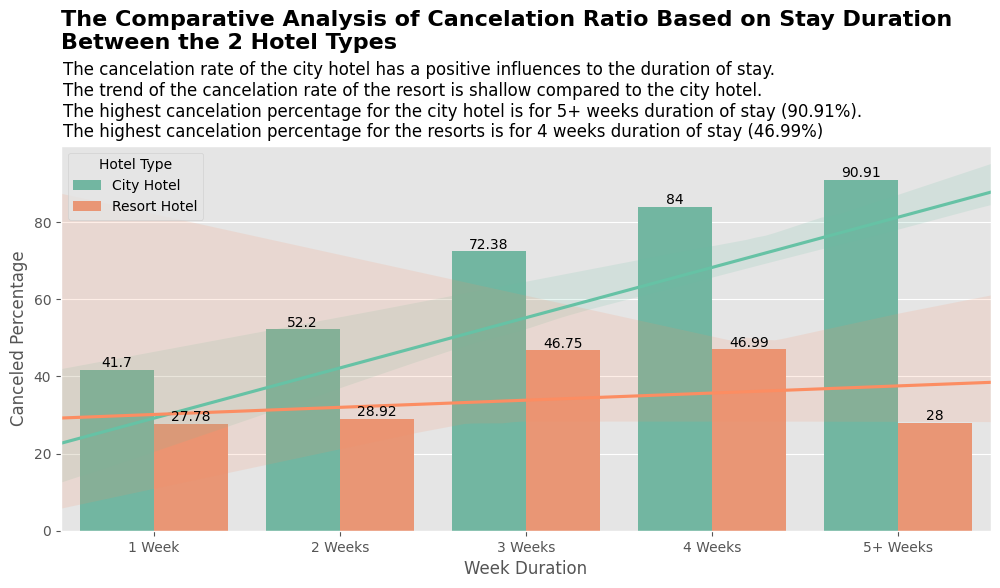

In [96]:
style.use('ggplot')

plt.figure(figsize = (12, 5))

ax = sns.barplot(hotel_booked_canceled, x = 'week_duration', y = 'canceled_percentage', hue = 'hotel_type', palette = 'Set2')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

sns.regplot(data = hotel_booked_canceled[hotel_booked_canceled['hotel_type'] == 'City Hotel'],
            x = 'index_week_duration', y = 'canceled_percentage',
            label = 'City Hotel', truncate = False, color = sns.color_palette('Set2')[0],
            scatter=False)
sns.regplot(data = hotel_booked_canceled[hotel_booked_canceled['hotel_type'] == 'Resort Hotel'],
            x = 'index_week_duration', y = 'canceled_percentage',
            label = 'Resort Hotel', truncate = False, color = sns.color_palette('Set2')[1],
            scatter=False)

plt.title('The Comparative Analysis of Cancelation Ratio Based on Stay Duration\nBetween the 2 Hotel Types\n\n\n\n',
          loc = 'left', fontsize = 16, weight = 'bold', pad = 2)
plt.suptitle('The cancelation rate of the city hotel has a positive influences to the duration of stay.\nThe trend of the cancelation rate of the resort is shallow compared to the city hotel.\nThe highest cancelation percentage for the city hotel is for 5+ weeks duration of stay (90.91%).\nThe highest cancelation percentage for the resorts is for 4 weeks duration of stay (46.99%)',
             x = 0.127, y = 1.05, horizontalalignment = 'left', fontsize = 12)

plt.xlabel('Week Duration')
plt.ylabel('Canceled Percentage')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title = 'Hotel Type')

plt.show()

# Impact Analysis of Lead Time on Hotel Bookings Cancelation Rate

<Axes: xlabel='lead_time', ylabel='Count'>

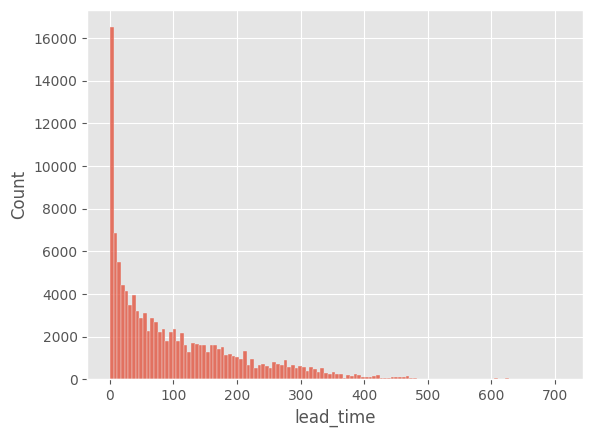

In [97]:
# Lead time duration distribution plot
sns.histplot(df, x='lead_time')

In [98]:
# Adding months duration column
month_duration = []

for x in df['lead_time']:
  if x >= 0 and x <= 30:
    month = '1 Month'
  elif x >= 31 and x <= 120:
    month = '2-4 Months'
  elif x >= 121 and x <= 210:
    month = '5-7 Months'
  elif x >= 211 and x <= 300:
    month = '8-10 Months'
  elif x >= 301 and x <= 360:
    month = '11-12 Months'
  else:
    month = '12+ Months'
  month_duration.append(month)

df['lead_time_month'] = month_duration

In [99]:
# Sorting categories
month_duration = ['1 Month', '2-4 Months', '5-7 Months', '8-10 Months', '11-12 Months', '12+ Months']

df = df.sort_values('lead_time_month', key = lambda x : pd.Categorical(x, categories=month_duration, ordered=True))

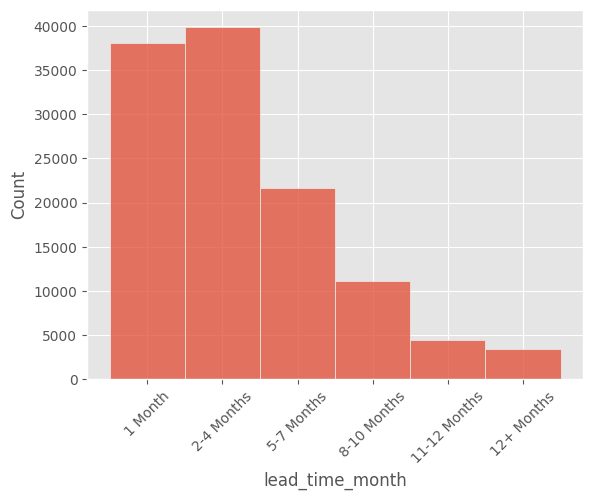

In [100]:
# Lead time month duration distribution plot
sns.histplot(df['lead_time_month'])

plt.xticks(rotation = 45)

plt.show()

In [101]:
hotel_booked_canceled

,hotel_type,week_duration,continued,canceled,canceled_percentage,index_week_duration
0,City Hotel,1 Week,45287,32391,41.70,1
1,City Hotel,2 Weeks,511,558,52.20,2
2,City Hotel,3 Weeks,29,76,72.38,3
3,City Hotel,4 Weeks,4,21,84.00,4
4,City Hotel,5+ Weeks,2,20,90.91,5
5,Resort Hotel,1 Week,25754,9907,27.78,1
6,Resort Hotel,2 Weeks,2650,1078,28.92,2
7,Resort Hotel,3 Weeks,90,79,46.75,3
8,Resort Hotel,4 Weeks,44,39,46.99,4
9,Resort Hotel,5+ Weeks,18,7,28.00,5


In [102]:
# Group by hotel type, lead time month duration, and whether it is canceled or not

lead_time_canceled = df.groupby(['hotel', 'lead_time_month', 'is_canceled']).agg({'reservation_status' : 'count'}).reset_index()

lead_time_canceled.columns = ['hotel_type', 'lead_time_month', 'is_canceled', 'total_reservation']

lead_time_canceled

,hotel_type,lead_time_month,is_canceled,total_reservation
0,City Hotel,1 Month,0,17848
1,City Hotel,1 Month,1,5174
2,City Hotel,11-12 Months,0,731
3,City Hotel,11-12 Months,1,2608
4,City Hotel,12+ Months,0,790
5,City Hotel,12+ Months,1,2074
6,City Hotel,2-4 Months,0,16406
7,City Hotel,2-4 Months,1,11783
8,City Hotel,5-7 Months,0,7298
9,City Hotel,5-7 Months,1,7051


In [103]:
lead_time_canceled = pd.pivot_table(lead_time_canceled,
                                       index = ['hotel_type', 'lead_time_month'],
                                       columns = 'is_canceled',
                                       values = 'total_reservation').reset_index()

lead_time_canceled

is_canceled,hotel_type,lead_time_month,0,1
0,City Hotel,1 Month,17848,5174
1,City Hotel,11-12 Months,731,2608
2,City Hotel,12+ Months,790,2074
3,City Hotel,2-4 Months,16406,11783
4,City Hotel,5-7 Months,7298,7051
5,City Hotel,8-10 Months,2760,4376
6,Resort Hotel,1 Month,13096,1976
7,Resort Hotel,11-12 Months,615,513
8,Resort Hotel,12+ Months,334,214
9,Resort Hotel,2-4 Months,7663,3999


In [104]:
lead_time_canceled.columns = ['hotel_type', 'lead_time_month', 'continued', 'canceled']

In [105]:
lead_time_canceled['cancelation_rate'] = round((lead_time_canceled['canceled'] /
                                               (lead_time_canceled['canceled'] + lead_time_canceled['continued']))* 100 , 2)

lead_time_canceled


,hotel_type,lead_time_month,continued,canceled,cancelation_rate
0,City Hotel,1 Month,17848,5174,22.47
1,City Hotel,11-12 Months,731,2608,78.11
2,City Hotel,12+ Months,790,2074,72.42
3,City Hotel,2-4 Months,16406,11783,41.80
4,City Hotel,5-7 Months,7298,7051,49.14
5,City Hotel,8-10 Months,2760,4376,61.32
6,Resort Hotel,1 Month,13096,1976,13.11
7,Resort Hotel,11-12 Months,615,513,45.48
8,Resort Hotel,12+ Months,334,214,39.05
9,Resort Hotel,2-4 Months,7663,3999,34.29


In [106]:
mapping_duration = {
    '1 Month' : 1,
    '2-4 Months' : 2,
    '5-7 Months' : 3,
    '8-10 Months' : 4,
    '11-12 Months' : 5,
    '12+ Months' : 6
}
lead_time_canceled['index_month_duration'] = lead_time_canceled['lead_time_month'].map(mapping_duration)

In [107]:
# Sorting categories

month_duration = ['1 Month', '2-4 Months', '5-7 Months', '8-10 Months', '11-12 Months', '12+ Months']

lead_time_canceled = lead_time_canceled.sort_values('lead_time_month', key = lambda x : pd.Categorical(x, categories=month_duration, ordered=True))

In [108]:
lead_time_canceled

,hotel_type,lead_time_month,continued,canceled,cancelation_rate,index_month_duration
0,City Hotel,1 Month,17848,5174,22.47,1
6,Resort Hotel,1 Month,13096,1976,13.11,1
3,City Hotel,2-4 Months,16406,11783,41.80,2
9,Resort Hotel,2-4 Months,7663,3999,34.29,2
4,City Hotel,5-7 Months,7298,7051,49.14,3
10,Resort Hotel,5-7 Months,4585,2685,36.93,3
5,City Hotel,8-10 Months,2760,4376,61.32,4
11,Resort Hotel,8-10 Months,2263,1723,43.23,4
1,City Hotel,11-12 Months,731,2608,78.11,5
7,Resort Hotel,11-12 Months,615,513,45.48,5


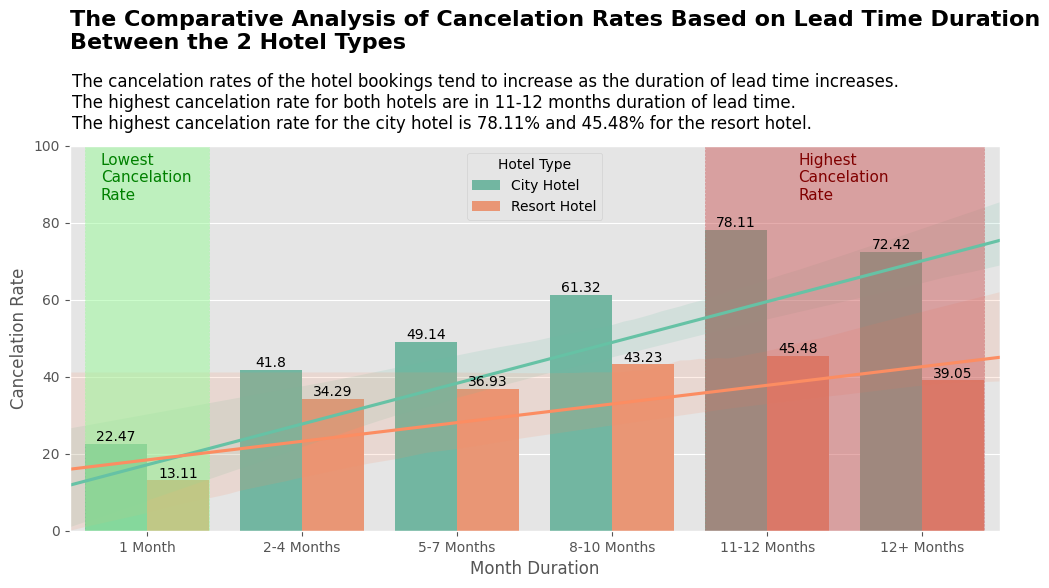

In [109]:
style.use('ggplot')

plt.figure(figsize = (12,5))

ax = sns.barplot(lead_time_canceled, x = 'lead_time_month', y = 'cancelation_rate', hue = 'hotel_type', palette = 'Set2')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

sns.regplot(data = lead_time_canceled[lead_time_canceled['hotel_type'] == 'City Hotel'],
            x = 'index_month_duration', y = 'cancelation_rate',
            label = 'City Hotel', truncate = False, color = sns.color_palette('Set2')[0],
            scatter=False)
sns.regplot(data = lead_time_canceled[lead_time_canceled['hotel_type'] == 'Resort Hotel'],
            x = 'index_month_duration', y = 'cancelation_rate',
            label = 'Resort Hotel', truncate = False, color = sns.color_palette('Set2')[1],
            scatter=False)

plt.title('The Comparative Analysis of Cancelation Rates Based on Lead Time Duration\nBetween the 2 Hotel Types\n\n\n\n',
          loc = 'left', fontsize = 16, weight = 'bold', pad = 2)
plt.suptitle('The cancelation rates of the hotel bookings tend to increase as the duration of lead time increases.\nThe highest cancelation rate for both hotels are in 11-12 months duration of lead time.\nThe highest cancelation rate for the city hotel is 78.11% and 45.48% for the resort hotel.',
             x = 0.127, y = 1.025, horizontalalignment = 'left', fontsize = 12)

# Highlight
plt.axvspan(-0.4, 0.4, color = 'palegreen', linestyle = '--', alpha = 0.5)
plt.axvspan(3.6, 5.4, color = 'indianred', linestyle = '--', alpha = 0.5)

# Set y axis limit to 100
plt.ylim(0, 100)

# Highlight text
plt.text(x = -0.3, y = 86, s = 'Lowest\nCancelation\nRate', fontsize = 11, color = 'green')
plt.text(x = 4.2, y = 86, s = 'Highest\nCancelation\nRate', fontsize = 11, color = 'maroon')

plt.xlabel('Month Duration')
plt.ylabel('Cancelation Rate')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title = 'Hotel Type')

plt.show()